100%|██████████| 101/101 [00:01<00:00, 52.06it/s]


First prints: 100 images
Second prints: 100 images


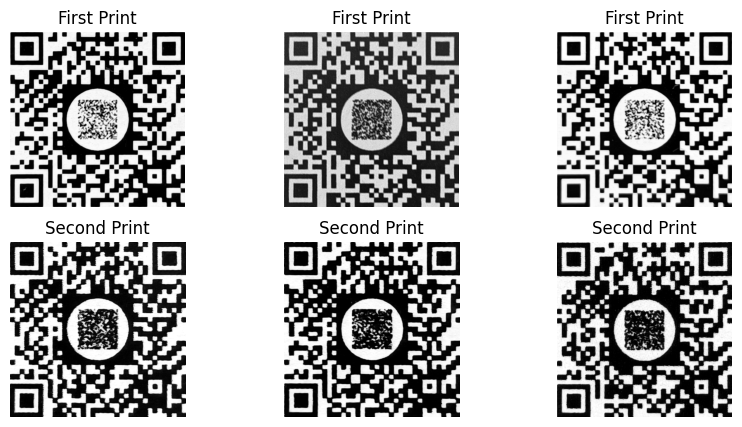


Summary statistics by class:
       mean-intensity                                                \
                count        mean        std        min         25%   
label                                                                 
first           100.0  121.614789  13.444310  97.930936  108.200246   
second          100.0  105.162473   7.097267  87.411893  101.137706   

                                           std-intensity              ...  \
               50%         75%         max         count        mean  ...   
label                                                                 ...   
first   128.782967  132.711928  137.937328         100.0  101.092796  ...   
second  106.068688  110.039164  129.985738         100.0   97.242957  ...   

                               sharpness                                     \
               75%         max     count        mean         std        min   
label                                                                 

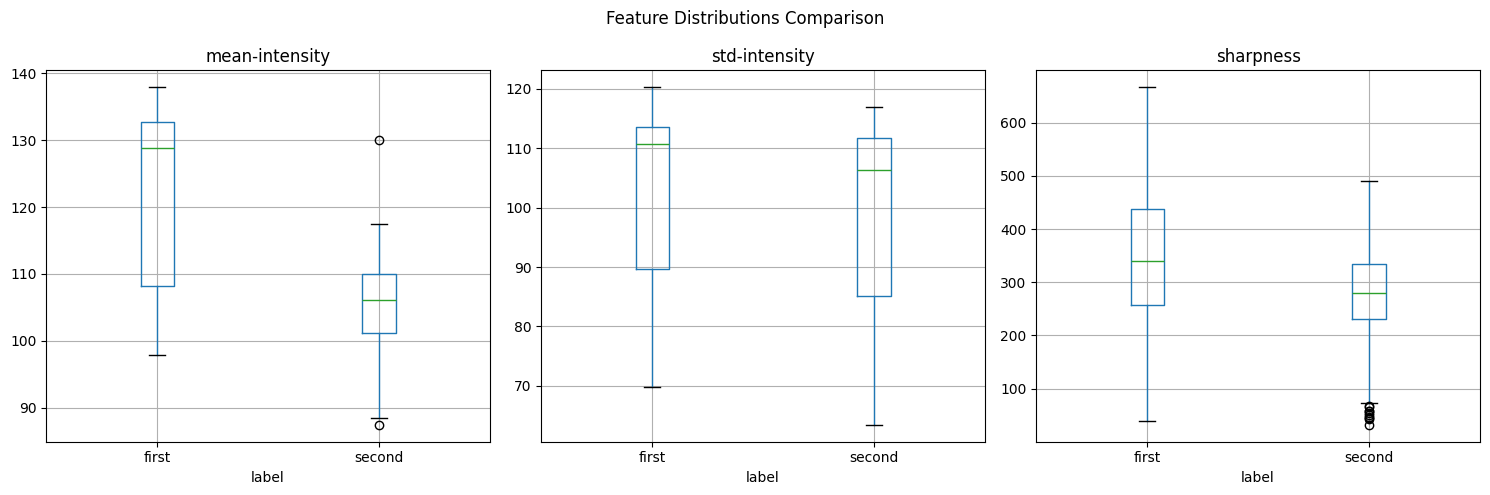

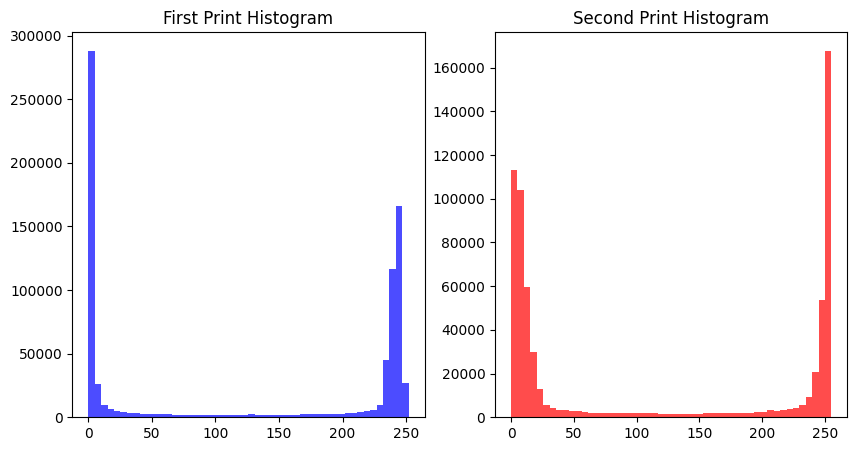

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

first_print_path = "First_Print"
second_print_path = "Second_Print"

def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(('.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels

first_images, first_labels = load_images(first_print_path, "first")
second_images, second_labels = load_images(second_print_path, "second")

print(f"First prints: {len(first_images)} images")
print(f"Second prints: {len(second_images)} images")

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(first_images[i], cmap='gray')
    plt.title("First Print")
    plt.axis('off')
    
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(second_images[i], cmap='gray')
    plt.title("Second Print")
    plt.axis('off')
plt.show()

def extract_features(images):
    features = []
    for img in images:
        mean = np.mean(img)
        std = np.std(img)
        
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        blurriness = laplacian.var()
        
        features.append([mean, std, blurriness])
    return features

first_features = extract_features(first_images)
second_features = extract_features(second_images)

df_first = pd.DataFrame(first_features, columns=['mean-intensity', 'std-intensity', 'sharpness'])
df_first['label'] = 'first'

df_second = pd.DataFrame(second_features, columns=['mean-intensity', 'std-intensity', 'sharpness'])
df_second['label'] = 'second'

df = pd.concat([df_first, df_second])

print("\nSummary statistics by class:")
print(df.groupby('label').describe())

# Plot feature distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['mean-intensity', 'std-intensity', 'sharpness']):
    df.boxplot(column=col, by='label', ax=axes[i])
    axes[i].set_title(col)
plt.suptitle('Feature Distributions Comparison')
plt.tight_layout()
plt.show()

# Pixel intensity histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(first_images[0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title("First Print Histogram")
plt.subplot(1, 2, 2)
plt.hist(second_images[0].flatten(), bins=50, color='red', alpha=0.7)
plt.title("Second Print Histogram")
plt.show()


Statistical significance (t-tests):
mean-intensity: t-stat = 10.82, p-value = 0.0000
std-intensity: t-stat = 1.66, p-value = 0.0977
sharpness: t-stat = 3.15, p-value = 0.0019

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.77      0.85      0.81        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



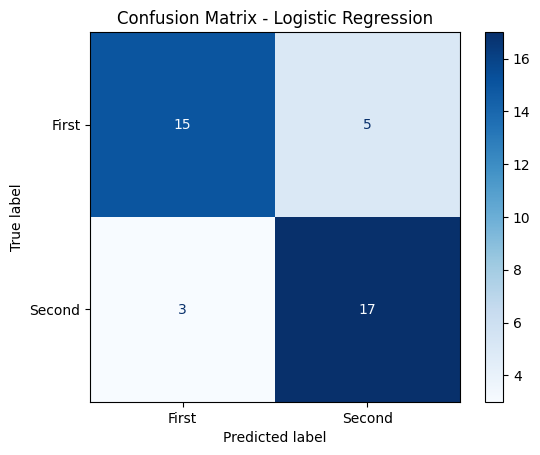


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.79      0.75      0.77        20

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40



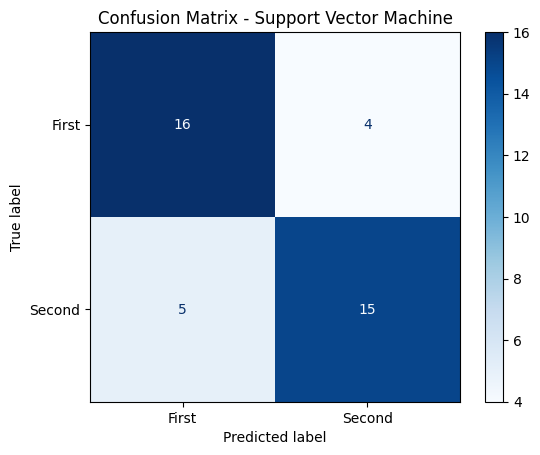


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.84      0.80      0.82        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



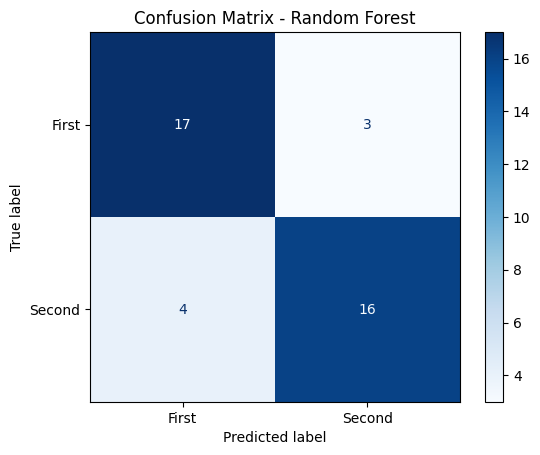


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.76      0.65      0.70        20

    accuracy                           0.72        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40



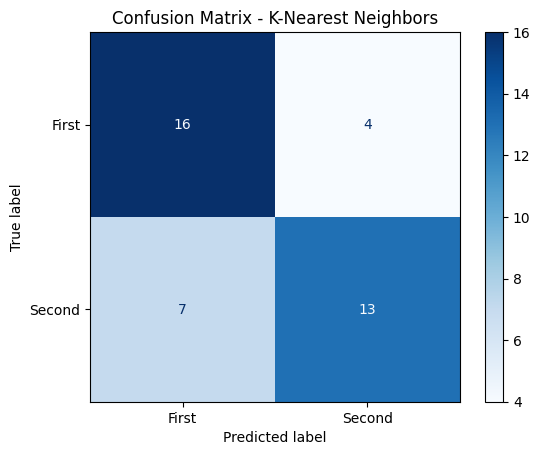


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.70      0.70      0.70        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



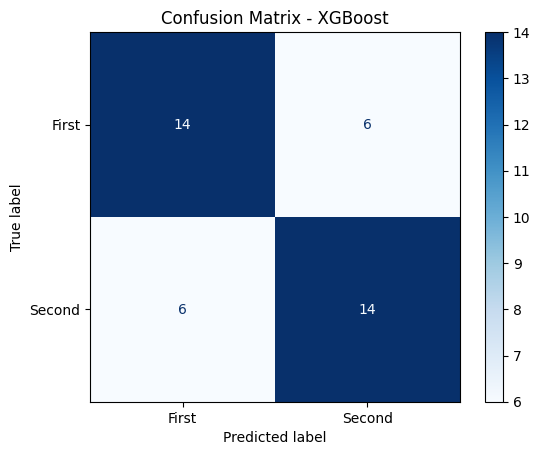


Model Performance Comparison:
                    Model  Accuracy  F1-Score
0     Logistic Regression     0.800  0.809524
1  Support Vector Machine     0.775  0.769231
2           Random Forest     0.825  0.820513
3     K-Nearest Neighbors     0.725  0.702703
4                 XGBoost     0.700  0.700000


In [4]:
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier( eval_metric='logloss')
}

print("\nStatistical significance (t-tests):")
for feature in ['mean-intensity', 'std-intensity', 'sharpness']:
    t_stat, p_val = stats.ttest_ind(
        df[df['label'] == 'first'][feature],
        df[df['label'] == 'second'][feature]
    )
    print(f"{feature}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

X = df[['mean-intensity', 'std-intensity', 'sharpness']]
y = df['label'].map({'first': 0, 'second': 1})  # Convert to binary labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append((name, acc, f1))
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['First', 'Second'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Display model performance comparison
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1-Score'])
print("\nModel Performance Comparison:")
print(df_results)


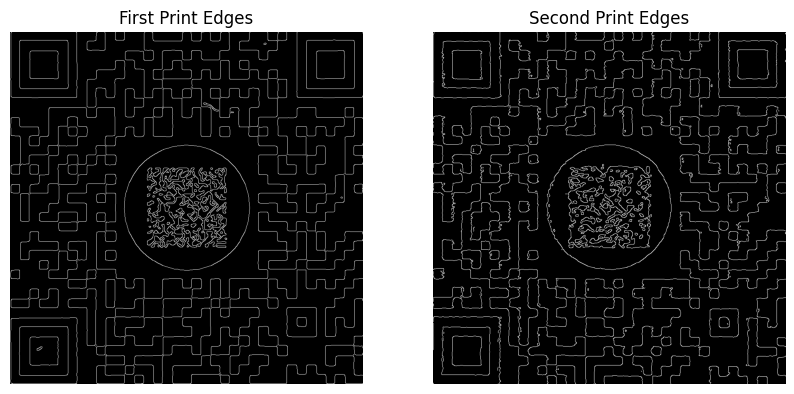

In [5]:
def plot_edges(img, title):
    edges = cv2.Canny(img, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_edges(first_images[0], 'First Print Edges')

plt.subplot(1, 2, 2)
plot_edges(second_images[0], 'Second Print Edges')
plt.show()

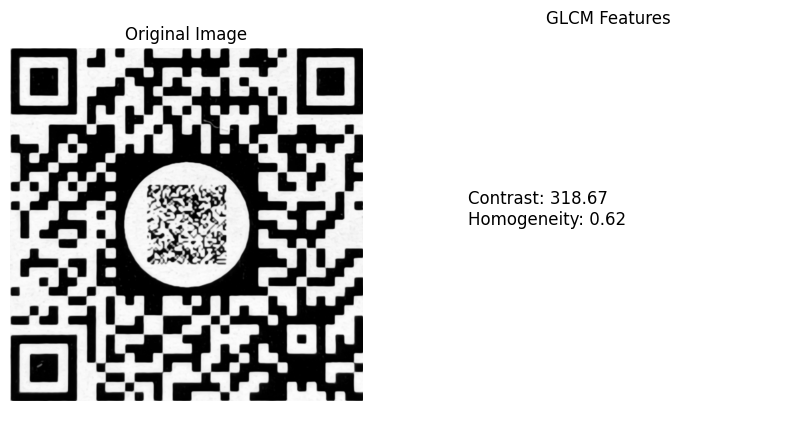

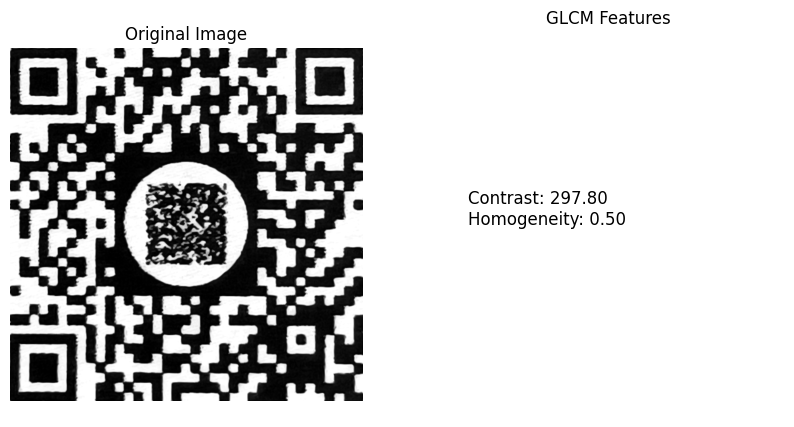

In [6]:
from skimage.feature import graycomatrix, graycoprops
def plot_glcm_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.text(0.1, 0.5, f"Contrast: {contrast:.2f}\nHomogeneity: {homogeneity:.2f}", fontsize=12)
    plt.axis('off')
    plt.title('GLCM Features')
    plt.show()

plot_glcm_features(first_images[0])
plot_glcm_features(second_images[0])

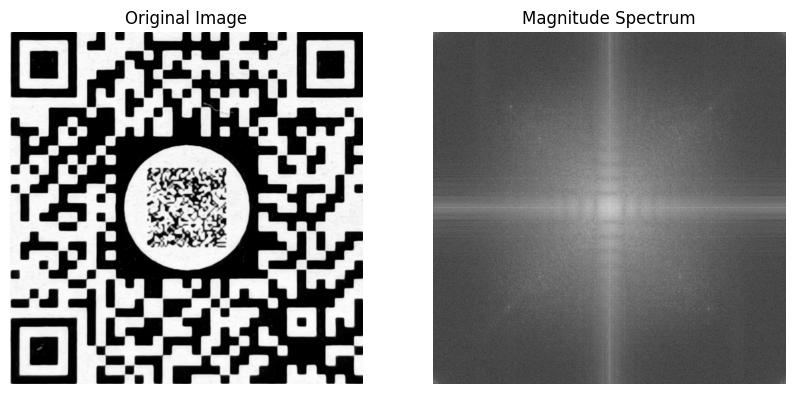

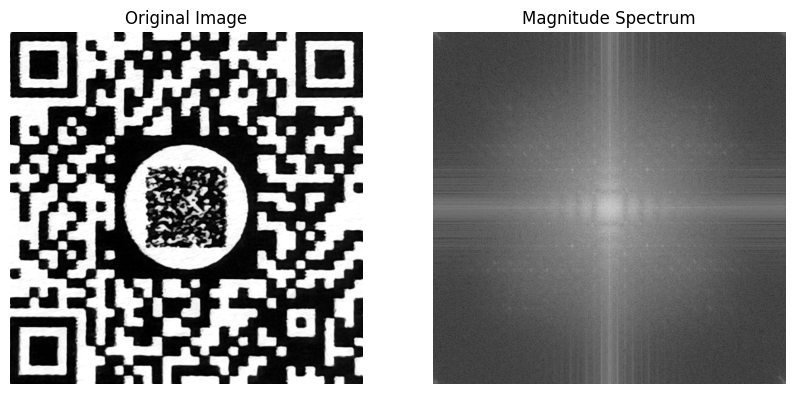

In [7]:
def plot_fourier_transform(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.log(np.abs(fft_shift) + 1) 
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')
    plt.show()

# Visualize Fourier Transform for a sample image
plot_fourier_transform(first_images[0])
plot_fourier_transform(second_images[0])

**Advanced Feature Engineering:**

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from tqdm import tqdm

first_print_path = "First_Print"
second_print_path = "Second_Print"

def calculate_noise_level(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
    diff = cv2.absdiff(img, blurred)
    
    noise_level = np.std(diff)
    return noise_level

def calculate_edge_density(img):
    edges = cv2.Canny(img, 100, 200)
    
    edge_density = np.mean(edges > 0)
    return edge_density

def calculate_lbp_features(img, radius=1, n_points=8):
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    
    hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  
    return hist

def extract_advanced_features(images):
    features = []
    for img in tqdm(images):
        mean = np.mean(img)
        std = np.std(img)
        
        # Sharpness (Laplacian variance)
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        sharpness = laplacian.var()
        
        # GLCM features (texture analysis)
        glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        
        # Fourier analysis (frequency domain)
        fft = np.fft.fft2(img)
        fft_shift = np.fft.fftshift(fft)
        magnitude_spectrum = np.abs(fft_shift)
        fft_mean = np.mean(magnitude_spectrum)
        fft_std = np.std(magnitude_spectrum)
        
        # New features
        noise_level = calculate_noise_level(img)
        edge_density = calculate_edge_density(img)
        lbp_features = calculate_lbp_features(img)
        
        # Combine all features
        features.append([
            mean, std, sharpness, 
            contrast, homogeneity, energy, correlation,
            fft_mean, fft_std,
            noise_level, edge_density,
            *lbp_features  # Unpack LBP histogram
        ])
    return features

def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png')):
            img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

first_images = load_images(first_print_path)
second_images = load_images(second_print_path)

print("\nExtracting features from first prints...")
first_features = extract_advanced_features(first_images)
print("\nExtracting features from second prints...")
second_features = extract_advanced_features(second_images)

columns = [
    'mean', 'std', 'sharpness', 
    'contrast', 'homogeneity', 'energy', 'correlation',
    'fft_mean', 'fft_std',
    'noise_level', 'edge_density',
    *[f'lbp_{i}' for i in range(10)]  # LBP histogram bins
]

df = pd.DataFrame(
    first_features + second_features,
    columns=columns
)
df['label'] = ['first']*len(first_images) + ['second']*len(second_images)

print("\nFeature DataFrame:")
print(df.head())


Extracting features from first prints...


100%|██████████| 100/100 [00:20<00:00,  5.00it/s]



Extracting features from second prints...


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


Feature DataFrame:
         mean         std   sharpness    contrast  homogeneity    energy  \
0  127.603518  113.671636  362.534724  318.674971     0.622351  0.165899   
1  104.514530   69.753634   52.400793  105.279604     0.388245  0.046955   
2  135.536854  112.458229  212.718568  214.121907     0.563245  0.104970   
3  109.284034   75.166792   59.804582   92.798622     0.385989  0.050905   
4  131.738243  119.480795  580.489122  424.192452     0.662448  0.250597   

   correlation      fft_mean        fft_std  noise_level  ...     lbp_1  \
0     0.987669  14033.227309  152474.344122     6.926663  ...  0.038262   
1     0.989185   7096.353368  102161.612237     2.360716  ...  0.030469   
2     0.991538  12672.719111  163474.181378     5.332529  ...  0.036110   
3     0.991788   8313.066360  118553.246842     2.544647  ...  0.030950   
4     0.985145  15849.233934  154809.557172     8.657189  ...  0.035379   

      lbp_2     lbp_3     lbp_4     lbp_5     lbp_6     lbp_7     lbp_8 


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



/home/deepak21319/deepak/.conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/deepak21319/deepak/.conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

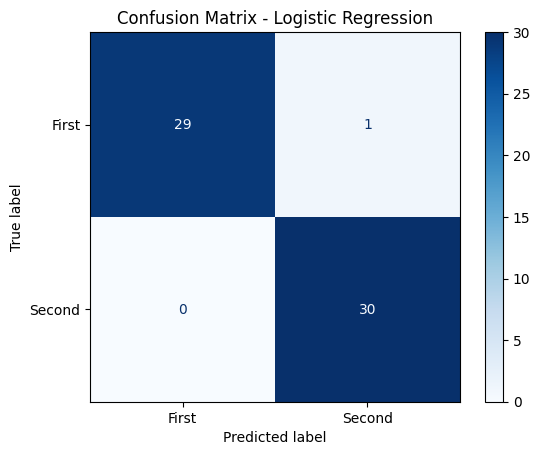


Training Support Vector Machine...

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



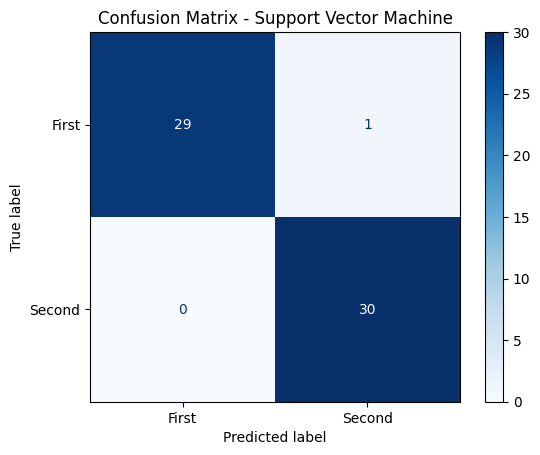


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



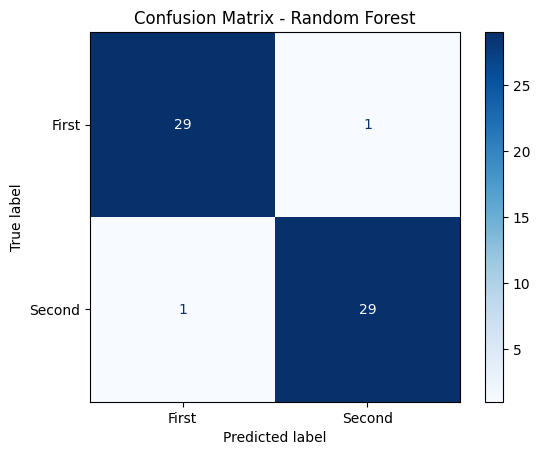


Training K-Nearest Neighbors...

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



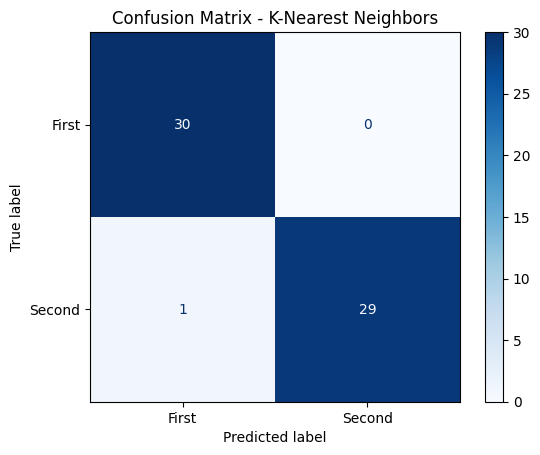


Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.87      0.91        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



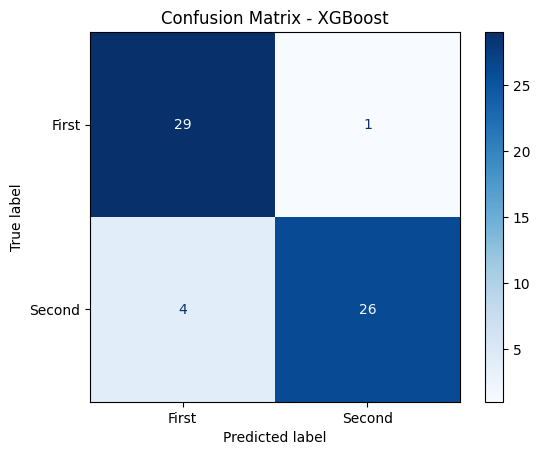


Model Performance Comparison:
                    Model  Accuracy  F1-Score  Mean CV Accuracy
0     Logistic Regression  0.983333  0.983607             0.885
1  Support Vector Machine  0.983333  0.983607             0.870
2           Random Forest  0.966667  0.966667             0.990
3     K-Nearest Neighbors  0.983333  0.983051             0.655
4                 XGBoost  0.916667  0.912281             0.985


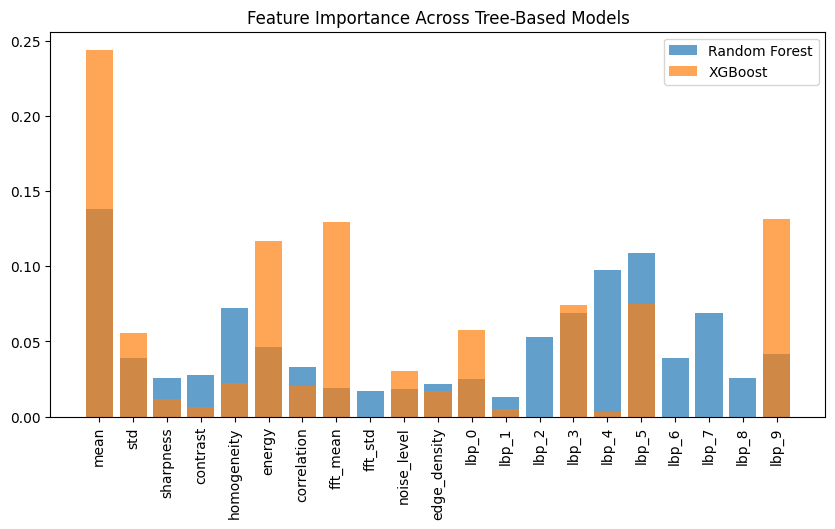

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop('label', axis=1)
y = df['label'].map({'first': 0, 'second': 1})  # Convert labels to binary (0 = first, 1 = second)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=40),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

results = []
feature_importance = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1, cv_scores.mean()))

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['First', 'Second'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = model.feature_importances_

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1-Score', 'Mean CV Accuracy'])
print("\nModel Performance Comparison:")
print(df_results)

plt.figure(figsize=(10, 5))
for model_name, importance in feature_importance.items():
    plt.bar(range(X.shape[1]), importance, alpha=0.7, label=model_name)

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("Feature Importance Across Tree-Based Models")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 160
Test set size: 40


Epoch 1/60 - Loss: 0.6915
Epoch 2/60 - Loss: 0.6903
Epoch 3/60 - Loss: 0.6833
Epoch 4/60 - Loss: 0.6707
Epoch 5/60 - Loss: 0.6593
Epoch 6/60 - Loss: 0.6582
Epoch 7/60 - Loss: 0.6445
Epoch 8/60 - Loss: 0.6224
Epoch 9/60 - Loss: 0.6102
Epoch 10/60 - Loss: 0.5998
Epoch 11/60 - Loss: 0.5946
Epoch 12/60 - Loss: 0.5828
Epoch 13/60 - Loss: 0.5444
Epoch 14/60 - Loss: 0.5324
Epoch 15/60 - Loss: 0.5202
Epoch 16/60 - Loss: 0.5134
Epoch 17/60 - Loss: 0.5236
Epoch 18/60 - Loss: 0.4999
Epoch 19/60 - Loss: 0.4996
Epoch 20/60 - Loss: 0.4837
Epoch 21/60 - Loss: 0.4680
Epoch 22/60 - Loss: 0.4756
Epoch 23/60 - Loss: 0.4670
Epoch 24/60 - Loss: 0.4637
Epoch 25/60 - Loss: 0.4826
Epoch 26/60 - Loss: 0.4725
Epoch 27/60 - Loss: 0.4463
Epoch 28/60 - Loss: 0.4492
Epoch 29/60 - Loss: 0.4367
Epoch 30/60 - Loss: 0.4627
Epoch 31/60 - Loss: 0.4132
Epoch 32/60 - Loss: 0.4155
Epoch 33/60 - Loss: 0.3888
Epoch 34/60 - Loss: 0.3650
Epoch 35/60 - Loss: 0.2987
Epoch 36/60 - Loss: 0.2715
Epoch 37/60 - Loss: 0.2574
Epoch 38/6

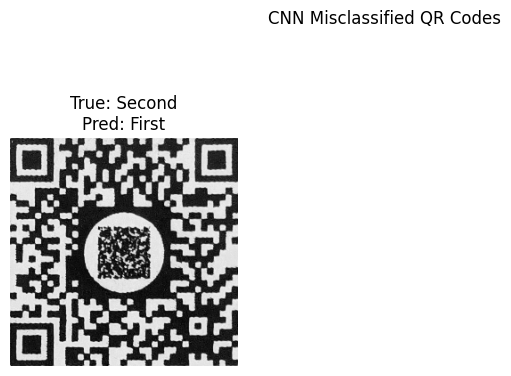

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class QRCodeDataset(Dataset):
    def __init__(self, first_dir, second_dir, transform=None, img_size=256):
        self.transform = transform
        self.img_size = img_size
        self.image_paths = []
        self.labels = []
        
        for fname in os.listdir(first_dir):
            self.image_paths.append(os.path.join(first_dir, fname))
            self.labels.append(0)
            
        for fname in os.listdir(second_dir):
            self.image_paths.append(os.path.join(second_dir, fname))
            self.labels.append(1)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (self.img_size, self.img_size))
        img = Image.fromarray(img)
        
        if self.transform:
            img = self.transform(img)
            
        label = self.labels[idx]
        return img, label

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomAdjustSharpness(2),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

full_dataset = QRCodeDataset(first_print_path, second_print_path)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

class QRCNN(nn.Module):
    def __init__(self):
        super(QRCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = QRCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
num_epochs = 60
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}')
    

model.eval()  
correct = 0
total = 0
misclassified_samples_cnn = []

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        
        predicted = (outputs >= 0.5).float()
        
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()
        
        misclassified = (predicted.squeeze() != labels).cpu().numpy()
        misclassified_samples_cnn.extend(zip(inputs.cpu()[misclassified], labels.cpu()[misclassified], predicted.cpu()[misclassified]))

final_accuracy = correct / total
print(f"Final accuracy: {final_accuracy:.4f}")

print(f"\nNumber of misclassified samples by CNN: {len(misclassified_samples_cnn)}")

# Visualize misclassified samples
plt.figure(figsize=(10, 5))
for i, (img, true_label, pred_label) in enumerate(misclassified_samples_cnn[:3]):
    img = img.squeeze().numpy()
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {'Second' if true_label == 1 else 'First'}\nPred: {'Second' if pred_label == 1 else 'First'}")
    plt.axis('off')
plt.suptitle('CNN Misclassified QR Codes')
plt.show()